In [1]:
%matplotlib inline

import os
import daft
import matplotlib.pyplot as plt
import numpy as np

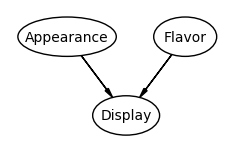

In [2]:
import matplotlib.pyplot as plt
pgm = daft.PGM()

### Line graph
pgm.add_node("Appearance", "Appearance", 0, 0, aspect=2.5)
pgm.add_node("Flavor", "Flavor", 1.5, 0, aspect=1.6)
pgm.add_node("Display", "Display", 0.75, -1, aspect=1.7)

pgm.add_edge("Flavor", "Display")
pgm.add_edge("Appearance", "Display")

pgm.render(dpi=100)
pgm.figure.savefig("figures/berkson.png")

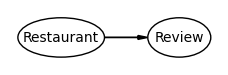

In [3]:
import matplotlib.pyplot as plt
pgm = daft.PGM()

### Line graph
pgm.add_node("0", r"Restaurant", 0, 0, aspect=2.2)
pgm.add_node("1", r"Review", 1.5, 0, aspect=1.6)

pgm.add_edge("0", "1")

pgm.render(dpi=100)
pgm.figure.savefig("figures/restaurants.png")

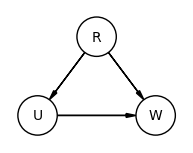

In [4]:
import matplotlib.pyplot as plt
pgm = daft.PGM()

### Line graph
pgm.add_node("rain", "R", 0.75, 1, aspect=1.0)
pgm.add_node("umbrella", r"U", 0, 0, aspect=1.0)
pgm.add_node("wet", r"W", 1.5, 0, aspect=1.0)

pgm.add_edge("rain", "umbrella")
pgm.add_edge("rain", "wet")
pgm.add_edge("umbrella", "wet")

pgm.render(dpi=100)
pgm.figure.savefig("figures/rain.png")

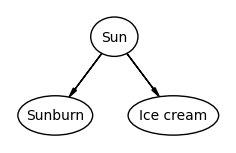

In [5]:
import matplotlib.pyplot as plt
pgm = daft.PGM()

### Line graph
pgm.add_node("s", r"Sunburn", 0, 0, aspect=1.9)
pgm.add_node("i", r"Ice cream", 1.5, 0, aspect=2.3)
pgm.add_node("w", r"Sun", 0.75, 1, aspect=1.2)

pgm.add_edge("w", "i")
pgm.add_edge("w", "s")

pgm.render()
pgm.figure.savefig("figures/sunburn_icecream.png")

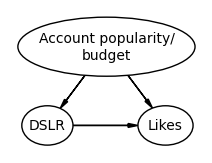

In [6]:
import matplotlib.pyplot as plt
pgm = daft.PGM()

### Line graph
pgm.add_node("account", "Account popularity/\nbudget", 0.75, 1, aspect=3.0, scale=1.5)
pgm.add_node("dslr", "DSLR", 0, 0, aspect=1.3)
pgm.add_node("likes", "Likes", 1.5, 0, aspect=1.4)

pgm.add_edge("account", "dslr")
pgm.add_edge("account", "likes")
pgm.add_edge("dslr", "likes")

pgm.render()
pgm.figure.savefig("figures/instagram.png")

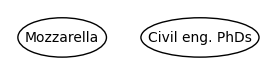

In [7]:
import matplotlib.pyplot as plt
pgm = daft.PGM()

### Line graph
pgm.add_node("mozz", r"Mozzarella", 0, 0, aspect=2.25)
pgm.add_node("phd", r"Civil eng. PhDs", 1.75, 0, aspect=3.0)

pgm.render()
pgm.figure.savefig("figures/spurious.png")

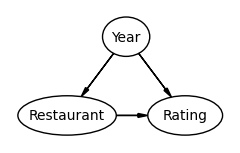

In [8]:
import matplotlib.pyplot as plt
pgm = daft.PGM()

### Line graph
pgm.add_node("rating", r"Rating", 1.5, 0, aspect=1.9)
pgm.add_node("restaurant", r"Restaurant", 0, 0, aspect=2.5)
pgm.add_node("year", r"Year", 0.75, 1, aspect=1.2)

pgm.add_edge("year", "rating")
pgm.add_edge("year", "restaurant")
pgm.add_edge("restaurant", "rating")

pgm.render()
pgm.figure.savefig("figures/restaurant.png")

In [9]:
import numpy as np
import pandas as pd
import random

import itertools

def make_simpson_df_and_science_table(
    treatments, outcomes, confounds, counts, treatment_name, outcome_name, confound_name
):
    agg_rows = []
    sample_rows = []
    def other(t):
        return list(set(treatments) - {t})[0]
    for ((it, t), (io, o), (ic, c)) in itertools.product(
        *(enumerate(l) for l in (treatments, outcomes, confounds))
    ):
        n = counts[it, io, ic]
        row = {
            treatment_name: t,
            outcome_name: o,
            confound_name: c,
            'count': n
        }
        agg_rows.append(row)
        
        sample_row = {
            f"{outcome_name} for {t}": io,
            f"{outcome_name} for {other(t)}": np.nan,
            confound_name: c
        }
        sample_rows.extend([sample_row] * n)
    random.shuffle(sample_rows)
    return (pd.DataFrame(agg_rows), pd.DataFrame(sample_rows))

In [10]:
food, food_sci = make_simpson_df_and_science_table(
    ["A", "B"],
    ["👎", "👍"],
    ["2019", "2020"],
    np.array([
        [[0, 80], [20, 100]],
        [[10, 10], [70, 10]],
    ]),
    "Restaurant", "Dish rating", "Year",
)

food.to_csv('data/restaurants.csv', index=False)
food_sci.to_csv('data/restaurants_counterfactuals.csv', index=False)

In [11]:
# Suppose we are trying to measure whether a certain pesticide is effective at 
# killing insects that eat crops. We conduct a randomized controlled trial, and 
# obtain the following data:

crops = make_simpson_df_and_science_table(
    ["Pesticide", "Control"],
    ["No insects", "insects"],
    ["Dead", "Alive"],
    np.array([
        [[0, 80], [20, 100]],
        [[10, 10], [70, 10]],
    ]),
    "Crop treatment", "", "Year",
)